# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



## Learning Objectives

At the end of the experiment, you will be able to :

* Understand Linear Regression

## Dataset

### Description

The dataset consists of two columns and 90 rows. Each column represents a characteristic of a simple pendulum i.e  **l** (length) and **t** (time period). The dataset describes the relationship between the **l** and **t** which is $𝐿∝𝑇^2$.

### Expected time : 60 mins

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [4]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "Demo_Linear_Regression_Pendulumn" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://www.dropbox.com/s/vu7xkf6j3v9p5np/AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt.zip?dl=1")
    ipython.magic("sx unzip AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt.zip?dl=1")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


#### Importing required Packages

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

####  Loading the data

In [6]:
data = pd.read_csv("AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt", sep=" ", header=None, names=['l', 't'])

To understand the design of the data, let us print first five rows and last five rows from the dataset

In [7]:
# First five rows from the dataset
data.head()

,l,t
0,0.10,0.69004
1,0.11,0.69497
2,0.12,0.74252
3,0.13,0.75360
4,0.14,0.83568


In [8]:
# Last five rows from the dataset
data.tail()

,l,t
85,0.95,1.9841
86,0.96,2.0066
87,0.97,2.0493
88,0.98,2.0503
89,0.99,2.0214


In [9]:
# Storing the l and t column values in two variables
l = data['l'].values
t = data['t'].values

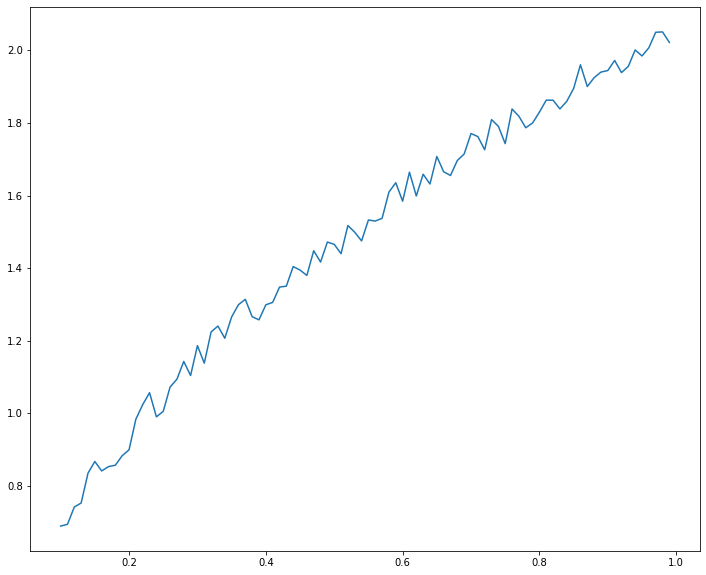

In [10]:
# Plotting l vs t
plt.figure(figsize=(12,10))
plt.plot(l, t)
plt.show()

The above graph does not look like a straightline which was obtained by connecting the points in the order of their occurrence.; it may be easier to see if we only plot the points.  

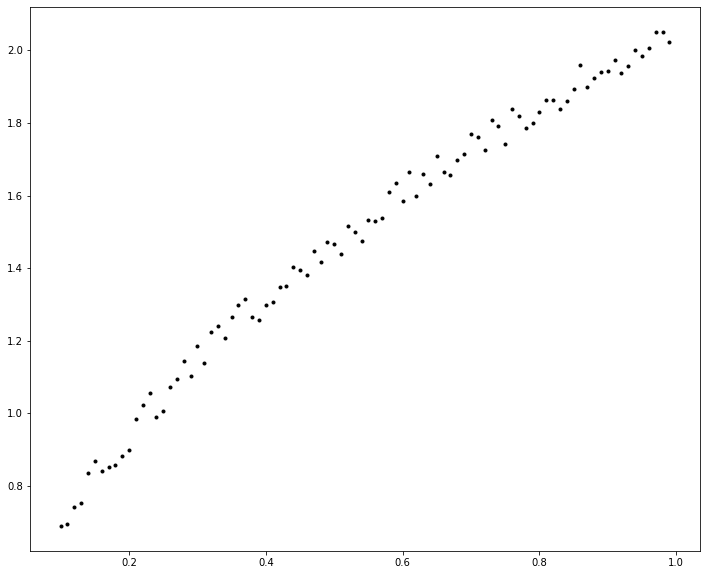

In [11]:
plt.figure(figsize=(12, 10))
plt.plot(l, t, '.k')
plt.show()

The above graph is still not a straightline. As we know from the domain information that  $l∝t^2$.  

Let us  plot  $ t^2 $  vs  $ l $ instead of $l$ vs $t$:

In [12]:
tsq = t * t

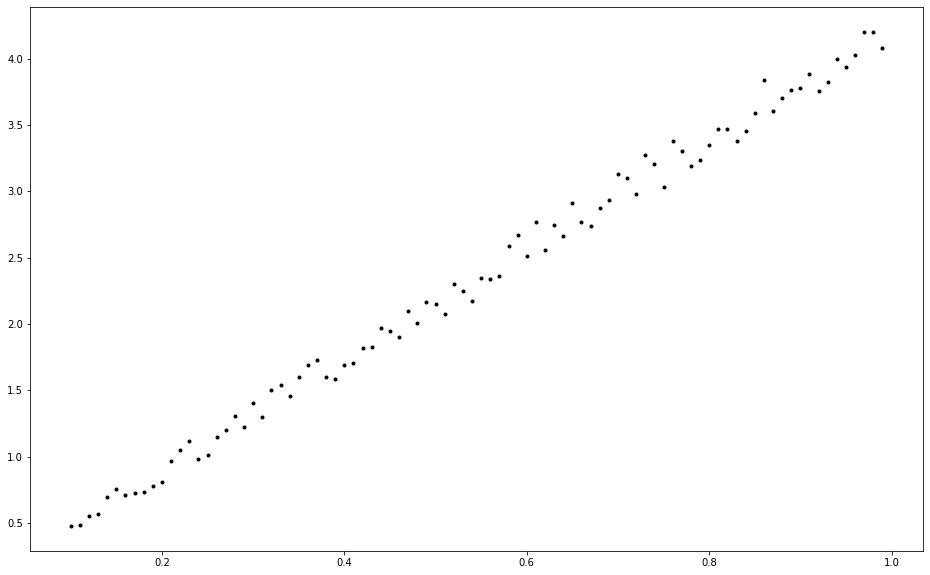

In [13]:
plt.figure(figsize=(16,10))
#plt.plot(x, Y)
plt.plot(l, tsq, '.k')
plt.show()

**Note**: Our dataset is of shape (90,2), where feature shape is (90,) and labels shape is (90,). By this when we train, the values will be considered as a single set of features. Hence, to overcome this we are reshaping the data into 2 dimensions (90,1) where each value is taken as a single feature.

The label will always be a single value, so we don't need to reshape it. But in further experiments where we perform train_test_split we should maintain the same no.of samples for both features and labels.

Hence reshaping $l$ and $t$ to a 2-D array.

In this notebook, you could try with and without a reshaping label.

To know more about reshaping, you can refer to the below link :
https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

In [14]:
l = l.reshape(-1,1)

In [15]:
tsq = tsq.reshape(-1,1)

In [16]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Training the model using the training set
regr.fit(l, tsq)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
pred_tsq = regr.predict(l)

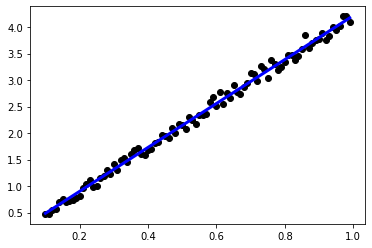

In [18]:
# Plotting a scatter representing l vs tsq
plt.scatter(l, tsq,  color='black')

# Plotting the line predicted using linear regression model
plt.plot(l, pred_tsq, color='blue', linewidth=3)

plt.show()

### Please answer the questions below to complete the experiment:

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [20]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "No thing" #@param {type:"string"}


In [21]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [22]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [23]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please answer Complexity Question
